In [1]:
import os
import glob
import SimpleITK as sitk
import numpy as np

In [ ]:
!nvidia-smi

In [6]:
!pip install simpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 2.0 MB/s eta 0:00:00:00:0100:01


In [42]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "labelprostatemaskprocessedtrial.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
labelprostatemaskprocessedtrial/10000_1000000_0000.nii.gz 2023-03-18 19:16:40          447
labelprostatemaskprocessedtrial/10000_1000000_0001.nii.gz 2023-03-18 19:16:40          444
labelprostatemaskprocessedtrial/10001_1000001_0000.nii.gz 2023-03-18 19:16:40          684
labelprostatemaskprocessedtrial/10001_1000001_0001.nii.gz 2023-03-18 19:16:40          689
labelprostatemaskprocessedtrial/10002_1000002_0000.nii.gz 2023-03-18 19:16:40          783
labelprostatemaskprocessedtrial/10002_1000002_0001.nii.gz 2023-03-18 19:16:40          776
labelprostatemaskprocessedtrial/10003_1000003_0000.nii.gz 2023-03-18 19:16:40          695
labelprostatemaskprocessedtrial/10003_1000003_0001.nii.gz 2023-03-18 19:16:40          693
labelprostatemaskprocessedtrial/10004_1000004_0000.nii.gz 2023-03-18 19:16:40          606
labelprostatemaskprocessedtrial/10004_1000004_0001.nii.gz 2023-03-18 19:16:40          606
labelprost

# 1. Re-slicing

In [45]:
def resample_img( image, out_spacing= (0.5, 0.5, 3.0), out_size= None, is_label= False, pad_value=None):
    """
    Resample images to target resolution spacing
    Ref: SimpleITK
    """
    #name = image
    image = sitk.ReadImage(image)
    # get original spacing and size
    original_spacing = image.GetSpacing()
    original_size = image.GetSize()

    # convert our z, y, x convention to SimpleITK's convention
    out_spacing = list(out_spacing)[::-1]

    if out_size is None:
        # calculate output size in voxels
        out_size = [
            int(np.round(
                size * (spacing_in / spacing_out)
            ))
            for size, spacing_in, spacing_out in zip(original_size, original_spacing, out_spacing)
        ]

    # determine pad value
    if pad_value is None:
        pad_value = image.GetPixelIDValue()

    # set up resampler
    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(list(out_spacing))
    resample.SetSize(out_size)
    resample.SetOutputDirection(image.GetDirection())
    resample.SetOutputOrigin(image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(pad_value)
    if is_label:
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    else:
        resample.SetInterpolator(sitk.sitkBSpline)

    # perform resampling
    image = resample.Execute(image)

    return image

In [5]:
#input_image = sitk.ReadImage(r'/Users/cjh/Documents/CISC881/Assignment1/Dataset/picai_public_images_fold0/10000/10000_1000000_hbv.mha')
input_image = 'newWithLittleData/trainingprocessedtrial/10002_1000002_hbv_0000.nii.gz'

In [6]:
image = sitk.ReadImage(input_image)

In [7]:
image.GetPixelIDValue()

9

In [15]:
t1 = sitk.GetArrayFromImage(image)
t1

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [17]:
t1.shape

(31, 640, 640)

In [54]:
out_image = resample_img(input_image, out_spacing= (0.5, 0.5, 3.0), out_size= None, is_label= False, pad_value=None)

In [57]:
print(image.GetSpacing())
print(image.GetSize())
print(image.GetSpacing()[0]*image.GetSpacing()[1]*image.GetSpacing()[2]*image.GetSize()[0]*image.GetSize()[1]*image.GetSize()[2])
print(out_image.GetSpacing())
print(out_image.GetSize())
print(out_image.GetSpacing()[0]*out_image.GetSpacing()[1]*out_image.GetSpacing()[2]*out_image.GetSize()[0]*out_image.GetSize()[1]*out_image.GetSize()[2])

(0.28125, 0.28125, 3.2999999825580133)
(640, 640, 31)
3314519.9824812687
(3.0, 0.5, 0.5)
(60, 360, 205)
3321000.0


# 2. Cropping

In [5]:
def crop_or_pad(image,size = (300, 300, 16)):

    # input conversion and verification
    #shape, size = input_verification_crop_or_pad(image, size, physical_size)
    shape = image.GetSize()

    # set identity operations for cropping and padding
    rank = len(size)
    padding = [[0, 0] for _ in range(rank)]
    slicer = [slice(None) for _ in range(rank)]

    # for each dimension, determine process (cropping or padding)
    for i in range(rank):
        if shape[i] < size[i]:

            # set padding settings
            padding[i][0] = (size[i] - shape[i]) // 2
            padding[i][1] = size[i] - shape[i] - padding[i][0]
        else:
            # create slicer object to crop image
            idx_start = int(np.floor((shape[i] - size[i]) / 2.))
            idx_end = idx_start + size[i]
            slicer[i] = slice(idx_start, idx_end)
    
    # crop and/or pad image
    if isinstance(image, sitk.Image):
        pad_filter = sitk.ConstantPadImageFilter()
        pad_filter.SetPadLowerBound([pad[0] for pad in padding])
        pad_filter.SetPadUpperBound([pad[1] for pad in padding])
        return pad_filter.Execute(image[tuple(slicer)])
    else:
        return np.pad(image[tuple(slicer)], padding)


In [58]:
cropped_image = crop_or_pad(out_image,size = (300, 300, 16))

In [60]:
print(cropped_image.GetSize())
print(cropped_image.GetSpacing())

(300, 300, 16)
(3.0, 0.5, 0.5)


In [46]:
sitk.WriteImage(cropped_image, 'cropped3.mha')

# 3. 2D slices:

In [57]:
#this function is used for images
def slicing(input_image):
    image_fold = []
    for i in range(0,16):
        image_fold.append(input_image[:,:,i])
    return image_fold

In [17]:
#this function is used for masks
def slicing(input_image):
        
    return input_image[:,:,7]

In [61]:
image_fold = slicing(cropped_image)

In [72]:
sitk.WriteImage(image_fold[0], 'cropped5.mha')

# 4. Augmentation:

In [48]:
#this function flip the image horizontally
def flipping(input_image):
    #get info of original image
    image_arr = sitk.GetArrayFromImage(input_image) # Note: order:z, y, x !!
    size = input_image.GetSize()
    origin = input_image.GetOrigin() #order: x, y, z
    spacing = input_image.GetSpacing() #order:x, y, z
    direction = input_image.GetDirection()
    #print(spacing) 

    pixelType = sitk.sitkUInt8
    image_flipped = sitk.Image(size,pixelType)

    image_arr_new = image_arr[::-1,:]
    #create the flipped image using new array and other info from original image
    image_flipped = sitk.GetImageFromArray(image_arr_new)
    image_flipped.SetDirection(direction)
    image_flipped.SetSpacing(spacing)
    image_flipped.SetOrigin(origin)
    return image_flipped

In [63]:
flipped = flipping(image_fold[0])

In [64]:
print(flipped.GetSpacing())
print(flipped.GetSize())

(3.0, 0.5)
(300, 300)


In [59]:
sitk.WriteImage(flipped, 'cropped8.mha')

# 5. Normalization

In [49]:
#this function make the mean of 0 and variance of 1.
def Normalization(input_image):
    # Convert the image to a Numpy array
    mri_array = sitk.GetArrayFromImage(input_image)

    # Compute the mean and standard deviation of the pixel intensities
    mean_intensity = np.mean(mri_array)
    std_intensity = np.std(mri_array)

    # Subtract the mean from each pixel intensity and divide by the standard deviation
    mri_array = (mri_array - mean_intensity) / std_intensity

    # Convert the normalized array back to a SimpleITK image
    mri_norm_image = sitk.GetImageFromArray(mri_array)
    mri_norm_image.SetOrigin(input_image.GetOrigin())
    mri_norm_image.SetSpacing(input_image.GetSpacing())
    mri_norm_image.SetDirection(input_image.GetDirection())
    return mri_norm_image

In [62]:
sitk.WriteImage(Normalization(flipped), '/Users/cjh/Documents/CISC881/Assignment1/trial/cropped8.mha')

# 6. Stratification

In [50]:
train_fold = []
test_fold = []
valid_fold = []
#add all adc, hbv, and t2w images from fold1, 2, and 4 to the train fold
for i in ['picai_public_images_fold1','picai_public_images_fold2','picai_public_images_fold4']:
    for root, dirs, files in os.walk(f'C:/Users/CJH/OneDrive/Documents/1Queens/CISC_881/Assignment3/Dataset/Dataset/{i}'):
        for name in files:
             if name.endswith(("adc.mha", "hbv.mha",'t2w.mha')):
                train_fold.append(os.path.join(root, name))

In [51]:
#add all adc, hbv, and t2w images from fold0 to the valid fold
for root, dirs, files in os.walk(f'C:/Users/CJH/OneDrive/Documents/1Queens/CISC_881/Assignment3/Dataset/Dataset/picai_public_images_fold0'):
        for name in files:
             if name.endswith(("adc.mha", "hbv.mha",'t2w.mha')):
                valid_fold.append(os.path.join(root, name))

In [52]:
#add all adc, hbv, and t2w images from fold3 to the test fold
for root, dirs, files in os.walk(f'C:/Users/CJH/OneDrive/Documents/1Queens/CISC_881/Assignment3/Dataset/Dataset/picai_public_images_fold3'):
        for name in files:
             if name.endswith(("adc.mha", "hbv.mha",'t2w.mha')):
                test_fold.append(os.path.join(root, name))

In [53]:
labelprostate_fold = []
labellesion_fold = []
#add all masks to prostate and lesion folds
for root, dirs, files in os.walk(f'C:/Users/CJH/OneDrive/Documents/1Queens/CISC_881/Assignment3/Dataset/picai_labels-main/anatomical_delineations/whole_gland/AI/Bosma22b'):
        for name in files:
             if name.endswith(("nii.gz")):
                labelprostate_fold.append(os.path.join(root, name))
for root, dirs, files in os.walk(f'C:/Users/CJH/OneDrive/Documents/1Queens/CISC_881/Assignment3/Dataset/picai_labels-main/csPCa_lesion_delineations/AI/Bosma22a'):
        for name in files:
             if name.endswith(("nii.gz")):
                labellesion_fold.append(os.path.join(root, name))

In [60]:
training_processed_name_fold = []
all_training_fold = []
#use for loop for each fold to process the data
for image in sorted(labelprostate_fold):
    training_processed_fold = []
    processed_image_fold = []
    #resample, crop, and slice the image
    resampled = resample_img(image)
    cropped = crop_or_pad(resampled)
    sliced = slicing(cropped)
    #then flip all images created by slice
    for slicedimage in sliced:
        flipped = flipping(slicedimage)
        processed_image_fold.append(slicedimage)
        processed_image_fold.append(flipped)
    #normalize the images
    for normalized in processed_image_fold:
        training_processed_fold.append(Normalization(normalized))
        #this adds normalized iamges, it is for images
        #all_training_fold.append(Normalization(normalized))
        #this adds unnormalized iamges, it is for masks
        all_training_fold.append(normalized)
    #get the name of the images or masks
    image_name = image.split('.')[0].split('/')[-1]
    print(image_name)
    #use for loop to create new names for them
    for i in range(0,len(training_processed_fold)):
        if i<10:
            new_name = image_name+'_000{}.nii.gz'.format(i)
            #new_name = image_name+'{}.nii.gz'.format(i)
        else:
            new_name = image_name+'_00{}.nii.gz'.format(i)
            #new_name = image_name+'{}.nii.gz'.format(i)
        training_processed_name_fold.append(new_name)
i=0
#write these iamges or masks to new folds
for image in all_training_fold:
    image_name = 'C:/Users/CJH/OneDrive/Documents/1Queens/CISC_881/CISC881_trial/CISC881/labelprostatemaskprocessedtrialnew/'+training_processed_name_fold[i].split('\\')[-1]
    # Convert to 16-bit integer
    #int_image = sitk.Cast(image, sitk.sitkUInt32)
    sitk.WriteImage(image, image_name)
    i+=1

Bosma22b\10000_1000000
Bosma22b\10001_1000001
Bosma22b\10002_1000002
Bosma22b\10003_1000003
Bosma22b\10004_1000004
Bosma22b\10005_1000005
Bosma22b\10006_1000006
Bosma22b\10007_1000007
Bosma22b\10008_1000008
Bosma22b\10009_1000009
Bosma22b\10010_1000010
Bosma22b\10011_1000011
Bosma22b\10012_1000012
Bosma22b\10013_1000013
Bosma22b\10014_1000014
Bosma22b\10015_1000015
Bosma22b\10016_1000016
Bosma22b\10017_1000017
Bosma22b\10018_1000018
Bosma22b\10019_1000019
Bosma22b\10020_1000020
Bosma22b\10021_1000021
Bosma22b\10022_1000022
Bosma22b\10023_1000023
Bosma22b\10024_1000024
Bosma22b\10025_1000025
Bosma22b\10026_1000026
Bosma22b\10027_1000027
Bosma22b\10028_1000028
Bosma22b\10029_1000029
Bosma22b\10030_1000030
Bosma22b\10031_1000031
Bosma22b\10032_1000032
Bosma22b\10033_1000033
Bosma22b\10034_1000034
Bosma22b\10035_1000035
Bosma22b\10036_1000036
Bosma22b\10037_1000037
Bosma22b\10038_1000038
Bosma22b\10039_1000039
Bosma22b\10040_1000040
Bosma22b\10041_1000041
Bosma22b\10042_1000042
Bosma22b\10

C:\Users\CJH\AppData\Local\Temp\ipykernel_24540\2425487074.py:10: RuntimeWarning: invalid value encountered in true_divide
  mri_array = (mri_array - mean_intensity) / std_intensity


Bosma22b\10079_1000079
Bosma22b\10080_1000080
Bosma22b\10081_1000081
Bosma22b\10082_1000082
Bosma22b\10083_1000083
Bosma22b\10084_1000084
Bosma22b\10085_1000085
Bosma22b\10086_1000086
Bosma22b\10087_1000087
Bosma22b\10088_1000088
Bosma22b\10089_1000089
Bosma22b\10090_1000090
Bosma22b\10091_1000091
Bosma22b\10092_1000092
Bosma22b\10093_1000093
Bosma22b\10094_1000094
Bosma22b\10095_1000095
Bosma22b\10096_1000096
Bosma22b\10097_1000097
Bosma22b\10098_1000098
Bosma22b\10099_1000099
Bosma22b\10100_1000100
Bosma22b\10101_1000101
Bosma22b\10102_1000102
Bosma22b\10103_1000103
Bosma22b\10104_1000104
Bosma22b\10105_1000105
Bosma22b\10106_1000106
Bosma22b\10107_1000107
Bosma22b\10108_1000108
Bosma22b\10109_1000109
Bosma22b\10110_1000110
Bosma22b\10111_1000111
Bosma22b\10112_1000112
Bosma22b\10113_1000113
Bosma22b\10114_1000114
Bosma22b\10115_1000115
Bosma22b\10116_1000116
Bosma22b\10117_1000117
Bosma22b\10118_1000118
Bosma22b\10119_1000119
Bosma22b\10120_1000120
Bosma22b\10121_1000121
Bosma22b\10

# write the text files for train, test, and validation loader

In [45]:
train_fold1=[]
#add processed images or masks to its corresponding folds
for file in glob.glob("wholedata/trainingprocessedtrial/**.nii.gz", recursive=True):
    train_fold1.append(file)
test_fold1=[]
for file in glob.glob("wholedata/testingprocessedtrial/**.nii.gz", recursive=True):
    test_fold1.append(file)
valid_fold1=[]
for file in glob.glob("wholedata/validprocessedtrial/**.nii.gz", recursive=True):
    valid_fold1.append(file)
labelprostate_fold1 = []
for file in glob.glob("wholedata/labelprostatemaskprocessedtrial/**.nii.gz", recursive=True):
    labelprostate_fold1.append(file)
labellesion_fold1 = []
for file in glob.glob("wholedata/labellesionmaskprocessedtrial/**.nii.gz", recursive=True):
    labellesion_fold1.append(file)

In [46]:
len(valid_fold1)

28800

In [52]:
label_prostate_path = "wholedata/labelprostatemaskprocessedtrial/"
label_lesion_path = "wholedata/labellesionmaskprocessedtrial/"
trainset,testset,valset = [],[],[]
#this creates a text file containing iamge paths and corresponding mask paths
for image in test_fold1:
    image_name = image.split('/')[-1]
    if image_name.split('_')[2] =='t2w':
        label_name = label_prostate_path + image_name.split('_')[0] + '_' +image_name.split('_')[1] + '_' + image_name.split('_')[3]
    else:
        label_name = label_lesion_path + image_name.split('_')[0] + '_' +image_name.split('_')[1] + '_' + image_name.split('_')[3]
    path_image = image
    path_label = label_name
    trainset.append(path_image+' '+path_label)
fileObject = open('wholedata/test.txt', 'w')
for i in trainset:
    fileObject.write(i)
    fileObject.write('\n')
fileObject.close()

# show if the flipped work properly

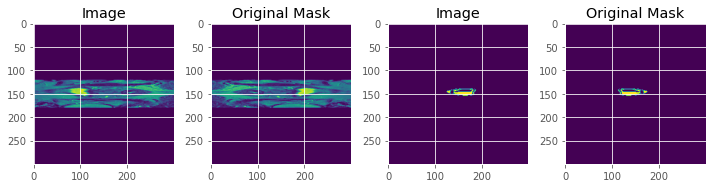

In [25]:
#here is an example to show the images and masks
import nibabel as nib
img = nib.load('newWithLittleData/validatingprocessedtrial/10000_1000000_t2w_0000.nii.gz')
data1 = img.get_fdata()
img1 = nib.load('newWithLittleData/validatingprocessedtrial/10000_1000000_t2w_0001.nii.gz')
data2 = img1.get_fdata()
#label = nib.load('C:/Users/CJH/OneDrive/Documents/1Queens/CISC_881/CISC881_trial/CISC881/newWithLittleData/labellesionmaskprocessedtrial/10016_1000016_0001.nii.gz')
label1 = nib.load('labelprostatemaskprocessedtrial/10000_1000000_0000.nii.gz')
label1 = label1.get_fdata()
label2 = nib.load(r'labelprostatemaskprocessedtrial/10000_1000000_0001.nii.gz')
label2 = label2.get_fdata()
#print(label.shape)
figure, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
ax[0].imshow(data1[:,:])
ax[1].imshow(data2[:,:])
ax[2].imshow(label1[:,:])
ax[3].imshow(label2[:,:])

ax[0].set_title("Image")
ax[1].set_title("Original Mask")   
ax[2].set_title("Image")
ax[3].set_title("Original Mask") 
figure.tight_layout()
figure.show()

# Build the model and start training

In [ ]:
import SimpleITK as sitk
import torch
import torch.nn as nn
import torch.utils.data as data
#import torch_directml
from torch import Tensor
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
from torch.utils import *
import numpy as np
import torch.nn.functional as F
from tqdm import tqdm

def double_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True)
    )   

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=False):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = (DoubleConv(n_channels, 64))
        self.down1 = (Down(64, 128))
        self.down2 = (Down(128, 256))
        self.down3 = (Down(256, 512))
        factor = 2 if bilinear else 1
        self.down4 = (Down(512, 1024 // factor))
        self.up1 = (Up(1024, 512 // factor, bilinear))
        self.up2 = (Up(512, 256 // factor, bilinear))
        self.up3 = (Up(256, 128 // factor, bilinear))
        self.up4 = (Up(128, 64, bilinear))
        self.outc = (OutConv(64, n_classes))

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

    def use_checkpointing(self):
        self.inc = torch.utils.checkpoint(self.inc)
        self.down1 = torch.utils.checkpoint(self.down1)
        self.down2 = torch.utils.checkpoint(self.down2)
        self.down3 = torch.utils.checkpoint(self.down3)
        self.down4 = torch.utils.checkpoint(self.down4)
        self.up1 = torch.utils.checkpoint(self.up1)
        self.up2 = torch.utils.checkpoint(self.up2)
        self.up3 = torch.utils.checkpoint(self.up3)
        self.up4 = torch.utils.checkpoint(self.up4)
        self.outc = torch.utils.checkpoint(self.outc)
class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

class DICELoss(nn.Module):

    def __init__(self):
        super(DICELoss, self).__init__()

    def forward(self, output, mask):

        probs = torch.squeeze(output, 1)
        mask = torch.squeeze(mask, 1)

        intersection = probs * mask
        intersection = torch.sum(intersection, 2)
        intersection = torch.sum(intersection, 1)

        den1 = probs * probs
        den1 = torch.sum(den1, 2)
        den1 = torch.sum(den1, 1)

        den2 = mask * mask
        den2 = torch.sum(den2, 2)
        den2 = torch.sum(den2, 1)

        eps = 1e-8
        dice = 2 * ((intersection + eps) / (den1 + den2 + eps))
        # dice_eso = dice[:, 1:]
        dice_eso = dice

        loss = 1 - torch.sum(dice_eso) / dice_eso.size(0)
        return loss
    
def default_loader(path):
    return sitk.ReadImage(path)
    #return sitk.GetArrayFromImage(sitk.ReadImage(path)).astype(np.float32)

def crop_or_pad(path,size = (572,572)):

    # input conversion and verification
    #shape, size = input_verification_crop_or_pad(image, size, physical_size)
    shape = path.GetSize()

    # set identity operations for cropping and padding
    rank = len(size)
    padding = [[0, 0] for _ in range(rank)]
    slicer = [slice(None) for _ in range(rank)]

    # for each dimension, determine process (cropping or padding)
    for i in range(rank):
        if shape[i] < size[i]:

            # set padding settings
            padding[i][0] = (size[i] - shape[i]) // 2
            padding[i][1] = size[i] - shape[i] - padding[i][0]
        else:
            # create slicer object to crop image
            idx_start = int(np.floor((shape[i] - size[i]) / 2.))
            idx_end = idx_start + size[i]
            slicer[i] = slice(idx_start, idx_end)
    
    # crop and/or pad image
    if isinstance(path, sitk.Image):
        pad_filter = sitk.ConstantPadImageFilter()
        pad_filter.SetPadLowerBound([pad[0] for pad in padding])
        pad_filter.SetPadUpperBound([pad[1] for pad in padding])
        return pad_filter.Execute(path[tuple(slicer)])
    else:
        return np.pad(path[tuple(slicer)], padding)

class Data(data.Dataset):
    def __init__(self,path, loader=default_loader):
        file=open(path,'r')
        fileReader = file.readlines()
        imgs,labels = [],[]
        for i in fileReader:
            i = i.strip()
            img,label = i.split(' ')
            imgs.append(img)
            labels.append(label)
        self.imgs = imgs
        self.labels = labels
        self.totensor=torchvision.transforms.ToTensor()
        self.loader = default_loader
        #self.resizer=crop_or_pad
        #self.resizer=torchvision.transforms.Resize((256,256))
    def __len__(self):
        return len(self.imgs)
    def __getitem__(self, index):
        
        img_path = self.imgs[index]
        label_path = self.labels[index]
        img = self.loader(img_path)
        label = self.loader(label_path)
        img = crop_or_pad(img)
        label = crop_or_pad(label)
        img = sitk.GetArrayFromImage(img).astype(np.float32)
        label = sitk.GetArrayFromImage(label).astype(np.float32)
        label[label==255.0] =1.0
        return self.totensor(img).to(device), self.totensor(label).to(device)

        

In [ ]:
#make sure if you have cuda
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device: ',device)


# initialize the model class before loading the model
model = UNet(1,1).to(device)
# load the model
#model.load_state_dict(torch.load('newWithLittleData/model0.005wholefewdata2.pth'))
#set the parameters
num_epochs=10
lr=0.001
optimizer=torch.optim.Adam(model.parameters(),lr=lr)
patience = 3
best_test_loss = float('inf')
train_losses = []
test_losses = []
train_accuracies = []
val_accuracies = []
for epoch in range(num_epochs):
    #load the data with batch size of 16, and shuffle = True
    train_loader = torch.utils.data.DataLoader(Data(path = 'wholedata/train.txt'),batch_size=16, shuffle = True)
    test_loader = torch.utils.data.DataLoader(Data(path = 'wholedata/test.txt'),batch_size=16, shuffle = True)
    
    #show the progress
    loop = tqdm(train_loader)
    #j = 0
    train_loss = 0
    model.train()
    #start training
    for i,(images,labels) in enumerate(loop):
        #get the image and mask
        images=images.to(device)
        labels=labels.to(device)
        #set the gradients to zero before starting to do backpropagation
        
        outputs=model(images)
        #get the dice loss
        loss=DICELoss()(outputs,labels)
        #makes the optimizer iterate over all parameters (tensors) it is supposed to update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss
        loop.set_postfix(loss=loss)
    train_loss /= len(loop)#(train_loader)
    train_losses.append(train_loss)
    # Evaluate the model on the validation set
    model.eval()
    
    test_loss = 0
    with torch.no_grad():
        #this is for the test set
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = DICELoss()(outputs, targets)
            test_loss += loss
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    # Check if the test loss has improved
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        best_model_state = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1

    # Early stopping
    if patience_counter >= patience:
        print(f"Stopping early after {epoch} epochs")
        break
    print(f"Epoch {epoch+1}, train_loss = {train_loss:.4f}, test_loss = {test_loss:.4f}")

# Load the best model state
model.load_state_dict(best_model_state)
# save the best model
torch.save(model.load_state_dict(best_model_state), 'wholedata/best_model0.001wholefewdata10epoch.pth')
# Evaluate the model on the test set
model.eval()

val_loss = 0
val_loader = torch.utils.data.DataLoader(Data(path = 'wholedata/valid.txt'),batch_size=16, shuffle = True)
#this is for the validation set
with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = model(inputs)
        loss = DICELoss()(outputs, targets)
        val_loss += loss
val_loss /= len(val_loader)
print(f"Validation loss = {val_loss:.4f}")
# serialize the model to disk
torch.save(model.state_dict(), 'wholedata/model0.001wholefewdata10epoch.pth')
# plot the training and testloss
plt.style.use("ggplot")
plt.figure()
plt.plot([i.item() for i in train_losses], label="train_loss")
plt.plot([i.item() for i in test_losses], label="test_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")


Device:  cuda


  0%|          | 0/5374 [00:00<?, ?it/s]/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 5374/5374 [3:10:19<00:00,  2.12s/it, loss=tensor(0.8387, device='cuda:0', grad_fn=<RsubBackward1>)]  


Epoch 1, train_loss = 0.7794, test_loss = 0.7747


100%|██████████| 5374/5374 [3:09:57<00:00,  2.12s/it, loss=tensor(0.7281, device='cuda:0', grad_fn=<RsubBackward1>)]  


Epoch 2, train_loss = 0.7577, test_loss = 0.7724


100%|██████████| 5374/5374 [3:09:54<00:00,  2.12s/it, loss=tensor(0.7131, device='cuda:0', grad_fn=<RsubBackward1>)]  


Epoch 3, train_loss = 0.7506, test_loss = 0.7691


 30%|███       | 1633/5374 [57:43<2:11:10,  2.10s/it, loss=tensor(0.8624, device='cuda:0', grad_fn=<RsubBackward1>)]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 4, train_loss = 0.7460, test_loss = 0.7664


 85%|████████▌ | 4571/5374 [2:41:40<28:13,  2.11s/it, loss=tensor(0.7951, device='cuda:0', grad_fn=<RsubBackward1>)]  IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 99%|█████████▉| 5316/5374 [3:08:06<02:03,  2.13s/it, loss=tensor(0.6299, device='cuda:0', grad_fn=<RsubBackward1>)]  

In [18]:
print('the training loss average is: ',np.mean([i.item() for i in train_losses]))
print('the testing loss average is: ',np.mean([i.item() for i in test_losses]))
print(f"Validation loss = {val_loss:.4f}")

the training loss average is:  0.7652568245587283
the testing loss average is:  0.7898282539354612
Validation loss = 0.9347


In [9]:
import SimpleITK as sitk
import torch
import torch.nn as nn
import torch.utils.data as data
#import torch_directml
from torch import Tensor
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
from torch.utils import *
import numpy as np
import torch.nn.functional as F
from tqdm import tqdm
def default_loader(path):
    return sitk.ReadImage(path)
class Data(data.Dataset):
    def __init__(self,path, loader=default_loader):
        file=open(path,'r')
        fileReader = file.readlines()
        imgs,labels = [],[]
        for i in fileReader:
            i = i.strip()
            img,label = i.split(' ')
            imgs.append(img)
            labels.append(label)
        self.imgs = imgs
        self.labels = labels
        self.totensor=torchvision.transforms.ToTensor()
        self.loader = default_loader
        #self.resizer=crop_or_pad
        #self.resizer=torchvision.transforms.Resize((256,256))
    def __len__(self):
        return len(self.imgs)
    def __getitem__(self, index):
        
        img_path = self.imgs[index]
        label_path = self.labels[index]
        img = self.loader(img_path)
        label = self.loader(label_path)
        img = crop_or_pad(img)
        label = crop_or_pad(label)
        img = sitk.GetArrayFromImage(img).astype(np.float32)
        label = sitk.GetArrayFromImage(label).astype(np.float32)
        label[label==255.0] =1.0
        return self.totensor(img).to(device), self.totensor(label).to(device)
    
def crop_or_pad(path,size = (572,572)):

    # input conversion and verification
    #shape, size = input_verification_crop_or_pad(image, size, physical_size)
    shape = path.GetSize()

    # set identity operations for cropping and padding
    rank = len(size)
    padding = [[0, 0] for _ in range(rank)]
    slicer = [slice(None) for _ in range(rank)]

    # for each dimension, determine process (cropping or padding)
    for i in range(rank):
        if shape[i] < size[i]:

            # set padding settings
            padding[i][0] = (size[i] - shape[i]) // 2
            padding[i][1] = size[i] - shape[i] - padding[i][0]
        else:
            # create slicer object to crop image
            idx_start = int(np.floor((shape[i] - size[i]) / 2.))
            idx_end = idx_start + size[i]
            slicer[i] = slice(idx_start, idx_end)
    
    # crop and/or pad image
    if isinstance(path, sitk.Image):
        pad_filter = sitk.ConstantPadImageFilter()
        pad_filter.SetPadLowerBound([pad[0] for pad in padding])
        pad_filter.SetPadUpperBound([pad[1] for pad in padding])
        return pad_filter.Execute(path[tuple(slicer)])
    else:
        return np.pad(path[tuple(slicer)], padding)

# load the trained model and show result

In [75]:
model = UNet(1,1).to(device)
# load the model
model.load_state_dict(torch.load(r"C:\Users\CJH\Downloads\xinde\model0.001whole6700xt10epoch.pth",map_location=torch.device('cpu')))


<All keys matched successfully>

C:\Users\CJH\AppData\Local\Temp\ipykernel_28428\2205940439.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


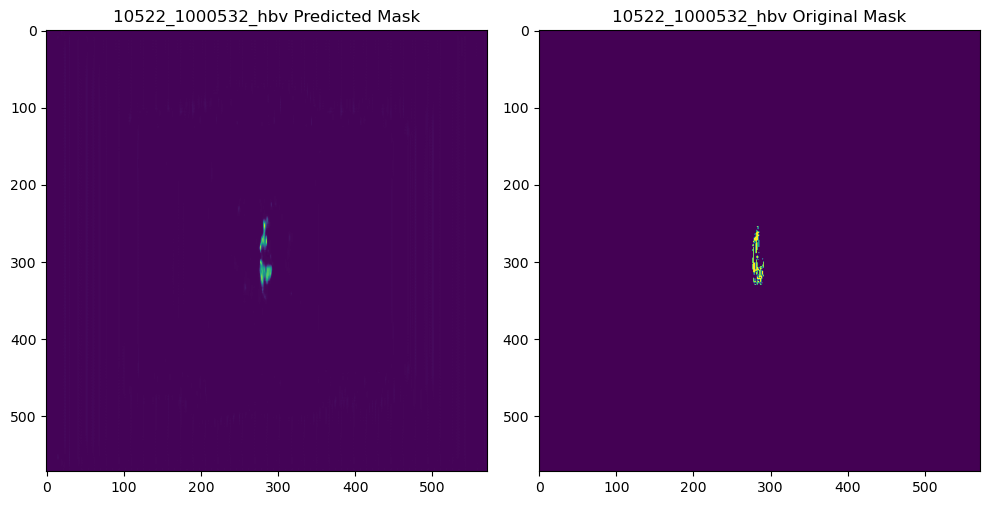

In [81]:
import nibabel as nib
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
valpred_loader = torch.utils.data.DataLoader(Data(path = 'C:/Users/CJH/Downloads/xinde/validpred.txt'))
for inputs, targets in valpred_loader:
    outputs = model(inputs).detach().cpu().numpy()
    #img = nib.load('newWithLittleData/validatingprocessedtrial/10000_1000000_t2w_0000.nii.gz')
    #data1 = img.get_fdata()
    label = nib.load(r"C:\Users\CJH\Downloads\xinde\10059_1000059_hbv.nii.gz")
    label = label.get_fdata()
    figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
    ax[0].imshow(outputs.squeeze()[:,:])
    ax[1].imshow(targets.detach().cpu().numpy().squeeze()[:,:])
    #ax[1].imshow(label[:,:,9])

    ax[0].set_title("10522_1000532_hbv Predicted Mask")
    ax[1].set_title("10522_1000532_hbv Original Mask")   
    
    figure.tight_layout()
    figure.show()

# show the model architecture

In [9]:
model = UNet(1,1).to(device)

In [10]:
print(model)

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 